### EDA 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('AIML Dataset.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dataset.shape

(6362620, 11)

In [4]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
# Used to find if dataset has any missing values
dataset.isna().sum().any()

False

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
dataset.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
dataset.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
# Finding which categories have most frauds
dfFraudCash_Out = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]
dfFraudPayment = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'PAYMENT')]
dfFraudCash_in = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_IN')]
dfFraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]
dfFraudDebit = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'DEBIT')]

print(len(dfFraudCash_Out))
print(len(dfFraudPayment))
print(len(dfFraudCash_in))
print(len(dfFraudTransfer))
print(len(dfFraudDebit))

4116
0
0
4097
0


In [11]:
# we will be taking only these types into our data for analysis as they are the only one which have fraudulent transactions
fraud_cashout = dataset.loc[(dataset.isFraud == 1) & (dataset['type'] == 'CASH_OUT')]
fraud_transfer = dataset.loc[(dataset.isFraud == 1) & (dataset['type'] == 'TRANSFER')]

In [12]:
# finding how many not fraudulent transactions cash out and transfers have
dfnotFraudCash_Out = dataset.loc[(dataset.isFraud == 0) & (dataset.type == 'CASH_OUT')]
dfnotFraudTransfer = dataset.loc[(dataset.isFraud == 0) & (dataset.type == 'TRANSFER')]

print(len(dfnotFraudCash_Out))
print(len(dfnotFraudTransfer))

2233384
528812


In [13]:
#reshaping the data randomly to balance the dataset and reduce overfitting
data1 = dataset.loc[(dataset.isFraud == 0) & (dataset['type'] == 'CASH_OUT')].sample(frac=0.002)
data2 = dataset.loc[(dataset.isFraud == 0) & (dataset['type'] == 'TRANSFER')].sample(frac=0.008)

In [14]:
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5516677,380,CASH_OUT,237271.76,C1036066281,0.0,0.0,C642542160,7786611.20,8023882.96,0,0
3876249,283,CASH_OUT,93908.94,C1691588902,0.0,0.0,C737556968,3067068.40,3160977.33,0,0
5371011,376,CASH_OUT,17395.59,C1020739272,0.0,0.0,C1888545654,1568088.97,1585484.56,0,0
5268292,372,CASH_OUT,128226.51,C537129465,0.0,0.0,C1553236748,224629.78,352856.30,0,0
4918516,350,CASH_OUT,140588.86,C688157003,4536.0,0.0,C114277259,590725.77,731314.63,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4390259,321,CASH_OUT,223379.92,C2058131649,0.0,0.0,C1569628312,1008695.98,1232075.90,0,0
1760281,161,CASH_OUT,145875.68,C703472496,132900.0,0.0,C1612206518,664682.02,810557.70,0,0
4349404,309,CASH_OUT,224329.06,C2119215643,0.0,0.0,C1207303174,627329.07,851658.13,0,0
2360065,190,CASH_OUT,139169.62,C1088512486,0.0,0.0,C292564380,531601.07,670770.69,0,0


In [15]:
data2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
819608,40,TRANSFER,238606.81,C649483749,0.0,0.0,C528664980,792469.14,1292117.53,0,0
2753169,212,TRANSFER,1086887.25,C39539152,50218.0,0.0,C565048549,1961533.15,3048420.41,0,0
4320926,308,TRANSFER,1269652.45,C1349829492,509.0,0.0,C1134338633,146966.76,1416619.20,0,0
1258406,134,TRANSFER,1633906.68,C1816959608,0.0,0.0,C66207672,7324636.45,8958543.13,0,0
3889816,284,TRANSFER,210722.10,C1530971837,0.0,0.0,C582901057,8611834.87,8822556.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2285479,187,TRANSFER,331025.49,C1797800413,0.0,0.0,C519199706,3826358.65,4157384.14,0,0
2241042,186,TRANSFER,312091.86,C1688628572,0.0,0.0,C1742778405,524387.85,836479.71,0,0
1021913,47,TRANSFER,523649.30,C1776916888,0.0,0.0,C491594320,595856.61,1119505.91,0,0
5288905,373,TRANSFER,118739.98,C96872102,0.0,0.0,C445530813,1434799.30,1553539.28,0,0


In [16]:
# creating our data set by concatenating the segregated data frames
fraud_data = pd.concat([data1,fraud_cashout, data2, fraud_transfer])
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5516677,380,CASH_OUT,237271.76,C1036066281,0.00,0.0,C642542160,7786611.20,8023882.96,0,0
3876249,283,CASH_OUT,93908.94,C1691588902,0.00,0.0,C737556968,3067068.40,3160977.33,0,0
5371011,376,CASH_OUT,17395.59,C1020739272,0.00,0.0,C1888545654,1568088.97,1585484.56,0,0
5268292,372,CASH_OUT,128226.51,C537129465,0.00,0.0,C1553236748,224629.78,352856.30,0,0
4918516,350,CASH_OUT,140588.86,C688157003,4536.00,0.0,C114277259,590725.77,731314.63,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [17]:
fraud_data.isFraud.sum()

8213

Now, column **type** is Categorical object which we convert into Numerical Data to apply operations on it

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(fraud_data['type'])
label

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
# Inserting converted type data into our dataset
fraud_data.insert(2,'type_num', label)

In [20]:
# Converting nameOrig column into only ids by removing C from its front
fraud_data['nameOrig'] = fraud_data['nameOrig'].replace({'C': ''}, regex=True)
fraud_data

,step,type,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5516677,380,CASH_OUT,0,237271.76,1036066281,0.00,0.0,C642542160,7786611.20,8023882.96,0,0
3876249,283,CASH_OUT,0,93908.94,1691588902,0.00,0.0,C737556968,3067068.40,3160977.33,0,0
5371011,376,CASH_OUT,0,17395.59,1020739272,0.00,0.0,C1888545654,1568088.97,1585484.56,0,0
5268292,372,CASH_OUT,0,128226.51,537129465,0.00,0.0,C1553236748,224629.78,352856.30,0,0
4918516,350,CASH_OUT,0,140588.86,688157003,4536.00,0.0,C114277259,590725.77,731314.63,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,1,63416.99,778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1,1258818.82,1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,1,339682.13,2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,1,6311409.28,1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [21]:
fraud_data['nameOrig'] = pd.to_numeric(fraud_data['nameOrig'])
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 5516677 to 6362618
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16910 non-null  int64  
 1   type            16910 non-null  object 
 2   type_num        16910 non-null  int64  
 3   amount          16910 non-null  float64
 4   nameOrig        16910 non-null  int64  
 5   oldbalanceOrg   16910 non-null  float64
 6   newbalanceOrig  16910 non-null  float64
 7   nameDest        16910 non-null  object 
 8   oldbalanceDest  16910 non-null  float64
 9   newbalanceDest  16910 non-null  float64
 10  isFraud         16910 non-null  int64  
 11  isFlaggedFraud  16910 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 1.7+ MB


### Feature Selection

Columns **step, nameDest, type and isFlaggedFraud** are not taken into consideration for training our prediction models because
column **nameDest** is string which are not providing any significance to our data, **type** column is dropped because we already converted it into numerical data and **isFlaggedFraud** is removed because we believe that it is the pre determined output which needs to be found out by the model. Also **step** is just hour out of 30 days of simulation

In [22]:
fraud_data = fraud_data.drop(['step','nameDest', 'type','isFlaggedFraud'], axis=1)

In [23]:
fraud_data

,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
5516677,0,237271.76,1036066281,0.00,0.0,7786611.20,8023882.96,0
3876249,0,93908.94,1691588902,0.00,0.0,3067068.40,3160977.33,0
5371011,0,17395.59,1020739272,0.00,0.0,1568088.97,1585484.56,0
5268292,0,128226.51,537129465,0.00,0.0,224629.78,352856.30,0
4918516,0,140588.86,688157003,4536.00,0.0,590725.77,731314.63,0
...,...,...,...,...,...,...,...,...
6362610,1,63416.99,778071008,63416.99,0.0,0.00,0.00,1
6362612,1,1258818.82,1531301470,1258818.82,0.0,0.00,0.00,1
6362614,1,339682.13,2013999242,339682.13,0.0,0.00,0.00,1
6362616,1,6311409.28,1529008245,6311409.28,0.0,0.00,0.00,1


In [24]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16910 entries, 5516677 to 6362618
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type_num        16910 non-null  int64  
 1   amount          16910 non-null  float64
 2   nameOrig        16910 non-null  int64  
 3   oldbalanceOrg   16910 non-null  float64
 4   newbalanceOrig  16910 non-null  float64
 5   oldbalanceDest  16910 non-null  float64
 6   newbalanceDest  16910 non-null  float64
 7   isFraud         16910 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.2 MB


In [25]:
#fraud_data.to_csv('fraud_data2.csv')

In [26]:
fraud_data.describe()

,type_num,amount,nameOrig,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,16910.000000,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,1.691000e+04,16910.000000
mean,0.492431,9.936974e+05,1.074653e+09,8.226118e+05,9.957235e+04,1.325000e+06,1.993605e+06,0.485689
std,0.499957,2.037729e+06,6.156526e+08,2.600995e+06,1.373771e+06,4.267323e+06,5.053152e+06,0.499810
min,0.000000,0.000000e+00,1.082330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,1.146271e+05,5.444120e+08,0.000000e+00,0.000000e+00,0.000000e+00,1.664862e+04,0.000000
50%,0.000000,2.872377e+05,1.072186e+09,5.804339e+04,0.000000e+00,1.687817e+05,5.974501e+05,0.000000
75%,1.000000,8.559277e+05,1.604055e+09,4.474747e+05,0.000000e+00,1.116851e+06,2.048603e+06,1.000000
max,1.000000,4.803592e+07,2.147395e+09,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [27]:
# Assigning values
X = fraud_data.iloc[:, :-1].values
y = fraud_data.iloc[:, -1].values

In [28]:
X

array([[0.00000000e+00, 2.37271760e+05, 1.03606628e+09, ...,
        0.00000000e+00, 7.78661120e+06, 8.02388296e+06],
       [0.00000000e+00, 9.39089400e+04, 1.69158890e+09, ...,
        0.00000000e+00, 3.06706840e+06, 3.16097733e+06],
       [0.00000000e+00, 1.73955900e+04, 1.02073927e+09, ...,
        0.00000000e+00, 1.56808897e+06, 1.58548456e+06],
       ...,
       [1.00000000e+00, 3.39682130e+05, 2.01399924e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.31140928e+06, 1.52900824e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.50002520e+05, 1.68599504e+09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
y

array([0, 0, 0, ..., 1, 1, 1])

### Splitting data into train and test set and also apply Feature Scaling

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Logistic Regression Model on training set

In [32]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
y_pred = lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


#### Making the Confusion Matrix

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2040  115]
 [ 289 1784]]
Accuracy of model: 0.9044465468306528


#### Recall Calculation

In [35]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8605885190545104


#### F1 Score Calculation

In [36]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8982880161127895


### Training on SVM

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [38]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2034  121]
 [ 282 1791]]
Accuracy of model: 0.9046830652790918


In [40]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8639652677279306


In [41]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8988707653701381


### Training on Naive bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = bayes.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(y_pred)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]
[1 1 1 ... 1 0 0]


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2102   53]
 [1068 1005]]
Accuracy of model: 0.7348628192999054


In [45]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.48480463096960924


In [46]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.6419674225487064


### Decision Tree

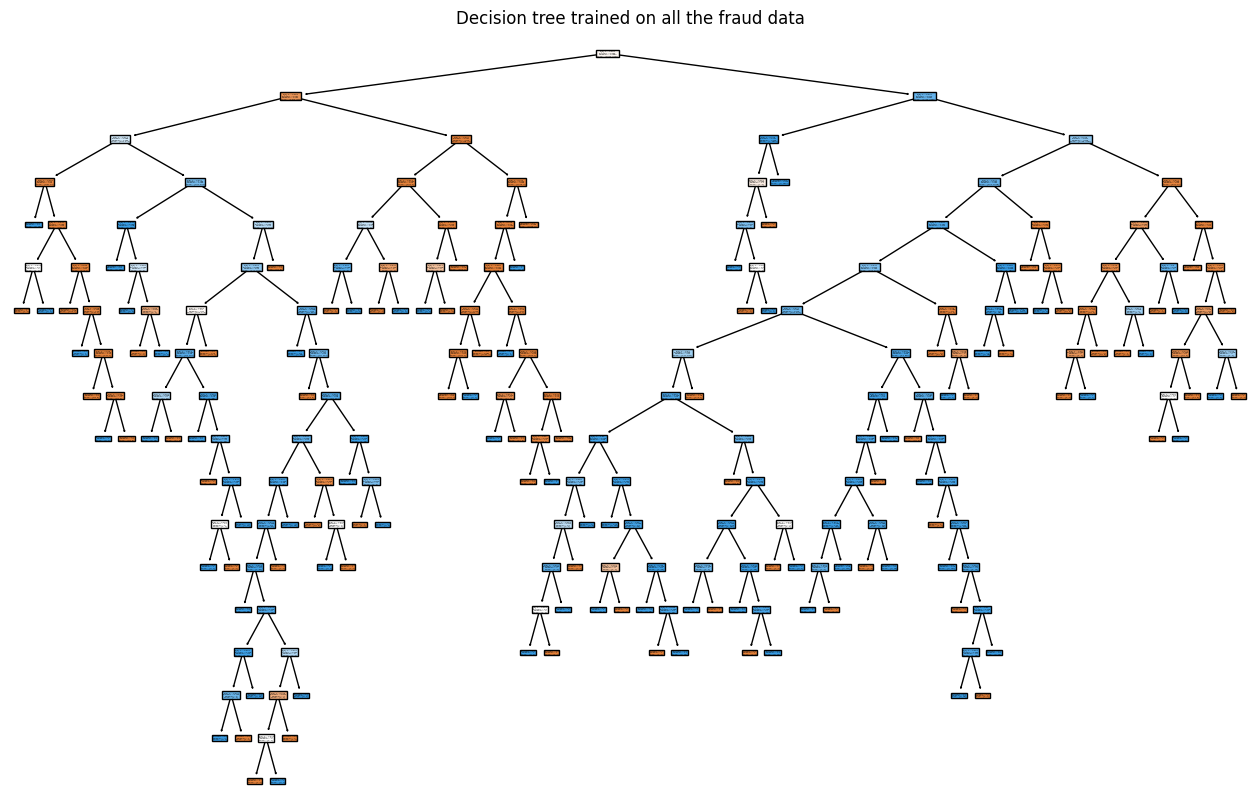

In [47]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dr.fit(X_train, y_train)
fig = plt.figure(figsize=(16,10))
tree.plot_tree(dr, filled=True)
plt.title("Decision tree trained on all the fraud data")
plt.show()

In [48]:
fig.savefig("decistion_tree.png")

In [49]:
y_pred = dr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [50]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2126   29]
 [  13 2060]]
Accuracy of model: 0.9900662251655629


In [51]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.9937288953207911


In [52]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.9899086977414705


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

In [54]:
y_pred = rf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy of model: {accuracy_score(y_test, y_pred)}")

[[2114   41]
 [  11 2062]]
Accuracy of model: 0.9877010406811731


In [56]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.994693680656054


In [57]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.9875478927203065


### Training with Kernel SVM

In [58]:
from sklearn.svm import SVC
kernel_svm = SVC(kernel = 'rbf', random_state = 0)
kernel_svm.fit(X_train, y_train)

SVC(random_state=0)

In [59]:
y_pred = kernel_svm.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 0]
 [0 0]]


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2025  130]
 [ 386 1687]]


0.8779564806054873

In [61]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
print(f"Recall Score of model: {recall_score(y_test, y_pred)}")

Recall Score of model: 0.8137964302942595


In [62]:
# 2*true positive /( 2*true positive + false positive + false negative)
print(f"F1 Score of model: {f1_score(y_test, y_pred)}")

F1 Score of model: 0.8673521850899744


### Predicting a single input

In [63]:
# type_num	amount	nameOrig	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest
print(classifier.predict(sc.transform([[0,74445.62,1796046115,0.00,0.0,1371784.99,1446230.61]])))

print(classifier.predict([[1,63416.99,778071008,63416.99,0.0,0.00,0.00]]))

[0]
[1]


We can see from above prediction that it came up with correct prediction for the above query

### Saving our model

In [64]:
import pickle

#Dumping our model into a file
with open('fraud_model3.bin', 'wb') as f_out:
    pickle.dump(dr, f_out)

### Trying our pickle model

In [65]:
with open('fraud_model3.bin', 'rb') as f_in:
     model3 = pickle.load(f_in)

In [66]:
# predicting the single value which we predicted before
# predict_mpg(sc.transform([[3, 14650.1, 908817173, 19373.0, 4722.9, 0.0, 0.0,]]), model)

model3.predict([[2, 14650.1, 908817173, 19373.0, 4722.9, 0.0, 0.0]])

array([0])

It gives the same result from before, it means our model is working fine